In [1]:
from RRI import *
import matplotlib.pyplot as plt
import h5py
from datetime import datetime
import pandas as pd
import numpy as np
from math import sqrt
%matplotlib inline

In [2]:
fn_=RRI("RRI_20150401_033844_034241_lv1_12.0.0.h5")

In [3]:
time=fn_.epop_met 
am1_=fn_.m1_mV
m1_=fn_.m1_mV
m2_=fn_.m2_mV
m3_=fn_.m3_mV
m4_=fn_.m4_mV
time=fn_.epop_met
geo_lat=fn_.glat_
geo_lon=fn_.glon_
alt=fn_.alt_

In [4]:
from scipy.interpolate import interp1d

x=np.linspace(0,237,num=238,endpoint=True)
y=fn_.epop_met
y1=fn_.glat_
y2=fn_.glon_
y3=fn_.alt_
#f=interp1d(x,y)
f2=interp1d(x,y,kind='linear')
f3=interp1d(x,y1,kind='linear')
f4=interp1d(x,y2,kind='linear')
f5=interp1d(x,y3,kind='linear')
xnew=np.linspace(0,237,num=14810126,endpoint=True)

In [5]:
time=f2(xnew)
geo_lat=f3(xnew)
geo_lon=f4(xnew)
alt=f5(xnew)

In [6]:
time2=[]
for i in range(len(time)):
    dt_obj1 = pd.to_datetime(time[i], unit='s',origin='1968-05-24')
    time2.append(dt_obj1)
df2 = pd.DataFrame (time2, columns = ['time'])
time_1=pd.to_datetime(df2['time'],format='%Y-%m-%d %H:%M:%S.%f')

In [7]:
loc_nan=np.isnan(m1_)
m1_[loc_nan]=0

loc_nan=np.isnan(m2_)
m2_[loc_nan]=0

loc_nan=np.isnan(m3_)
m3_[loc_nan]=0

loc_nan=np.isnan(m4_)
m4_[loc_nan]=0

In [8]:
diapole_1=m1_+1j*m2_
diapole_2=m3_+1j*m4_

v1=abs(diapole_1) #amplitude of diapole 1
v2=abs(diapole_2)  #amplitude of diapole 2

/var/folders/8l/7k_mplps7kz72wzrx6292kph0000gn/T/ipykernel_6155/3853976956.py:1: RuntimeWarning: divide by zero encountered in divide
  phase=np.arctan((m2_/m1_))
/var/folders/8l/7k_mplps7kz72wzrx6292kph0000gn/T/ipykernel_6155/3853976956.py:1: RuntimeWarning: invalid value encountered in divide
  phase=np.arctan((m2_/m1_))


(2000.0, 2200.0)

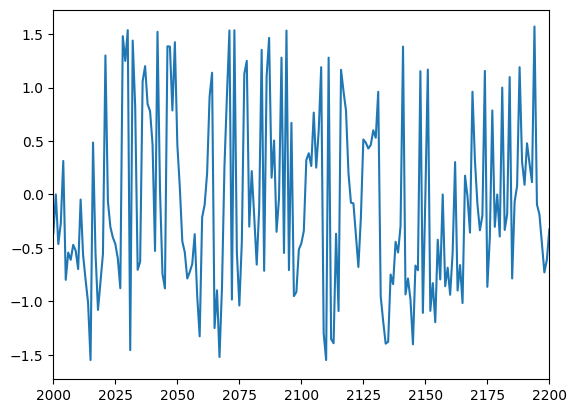

In [9]:
phase=np.arctan((m2_/m1_))
plt.plot(phase)
plt.xlim(2000,2200)

(0.0, 16.0)

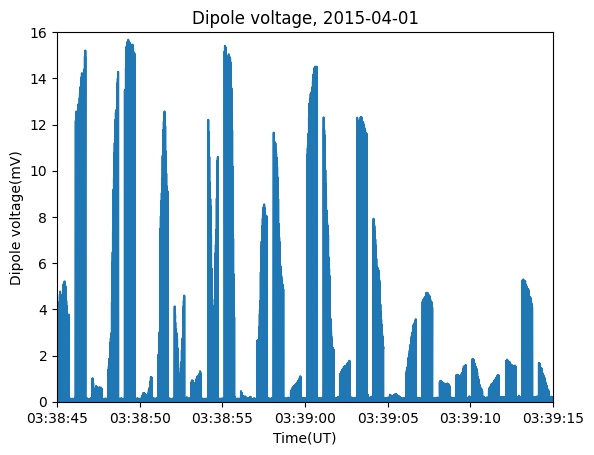

In [11]:
plt.plot(time_1,v1)
plt.xlim(left=pd.Timestamp('2015-04-01 03:38:45'),right=pd.Timestamp('2015-04-01 03:39:15'))
plt.xlabel('Time(UT)')
plt.ylabel('Dipole voltage(mV)')
plt.title('Dipole voltage, 2015-04-01')
plt.ylim(0,16)

In [14]:
#finding the pulse present in the signal of diapole 1 and 2

pks_1=DARN_pulse_seeker(v1)
pks_2=DARN_pulse_seeker(v2)
x=pks_1[0]
y=pks_2[0]

Text(0.5, 1.0, 'April 1,2015-dipole voltage')

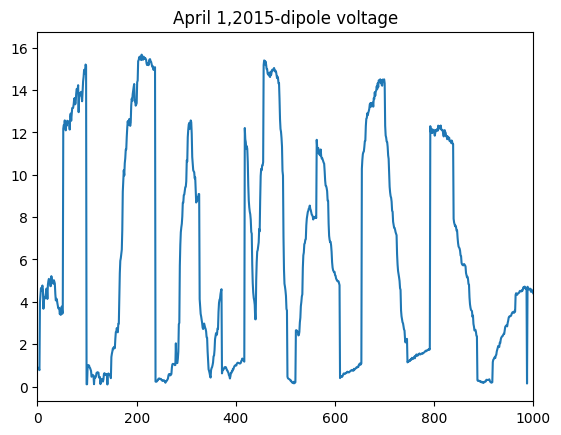

In [15]:
plt.plot(v1[x])
plt.xlim(0,1000)
plt.title('April 1,2015-dipole voltage')
#plt.ylim(0,2)

In [14]:
##diapole v1

In [16]:
def from_3d_numpy_to_2d_array(X):
    array_2d = X.reshape(X.shape[0], -1)
    return array_2d

In [17]:
pulse1=[]
for i in range(len(x)):
                 df_v1=pd.DataFrame(v1)
                 v_1=(df_v1.iloc[x[i]-20:x[i]+20]).reset_index(drop=True)
                 pulse1.append(v_1)


In [18]:
g=np.array(pulse1)
n1=from_3d_numpy_to_2d_array(g)
print(n1.shape)


(10411, 40)


In [19]:
data_pulse_v1=pd.DataFrame(n1).T
#data_pulse_v1.to_csv('pulsdatav1.txt')

In [20]:
data_array=n1
df=[]
n=10
for i in range(len(data_array)):
                 z=data_array[i]
                 final = [z[j * n:(j + 1) * n] for j in range((len(z) + n - 1) // n )] #dividing array into n subarray
                 total=np.sum(final,axis=1)       #takaing sum of each subarray
                 n2=total.argmax() #position of maximum sum
                 #n2=np.where(total==(max(total)))      
                 #n3=[items for t in n2 for items in t]
                 lc=final[n2]
                 n4=np.where(z==(lc[int(len(lc))//2])) #finding the position of middle value in array
                 n5=[item for u in n4 for item in u] #postion of middle value
                 mc=z[n5[0]-6:n5[0]+6] #taking number of data around the middle vlaue of array
                 df.append(mc)
                 i=i+1
    

In [21]:
df=np.array(df)
df_int=df**2

/var/folders/8l/7k_mplps7kz72wzrx6292kph0000gn/T/ipykernel_6155/3515526781.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df=np.array(df)


In [22]:
s4_new_v=[]
for i in range(len(df_int)):
    s4=sqrt((np.nanmean((df_int[i])**2)-(np.nanmean(df_int[i]))**2)/(np.nanmean(df_int[i]))**2)
    s4_new_v.append(s4)

/var/folders/8l/7k_mplps7kz72wzrx6292kph0000gn/T/ipykernel_6155/397159973.py:3: RuntimeWarning: Mean of empty slice
  s4=sqrt((np.nanmean((df_int[i])**2)-(np.nanmean(df_int[i]))**2)/(np.nanmean(df_int[i]))**2)


In [23]:
s4_new_v=np.array(s4_new_v)
s4_new_v

array([0.07674343, 0.07434924, 0.06146584, ..., 0.28602701, 0.32294885,
       0.29154725])

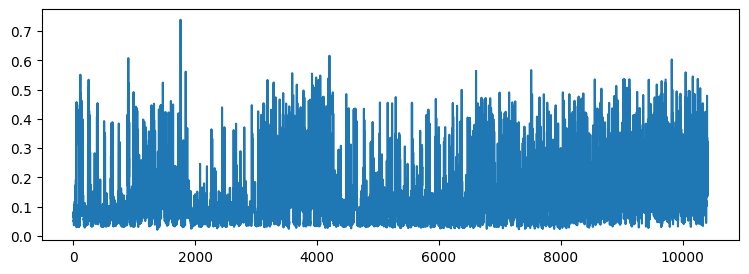

In [24]:
plt.figure(figsize=(9,3))
plt.plot(s4_new_v)
#plt.xlim(3000,4000)
#plt.savefig('fad.jpg')
plt.show()

In [24]:
#s4 calclation new approach

In [25]:

ls=[]
list_new=[]
for k in range(len(n1)):
                 sub_n1=n1[k]
                 for i in range(30):
                                  j=0
                                  sublist=sub_n1[i+j:i+j+10]
                                  sum=np.sum(sublist) 
                                  n0=sum.argmax()
                                  sublist1=sublist[n0]
                                  #sublist1=np.array(sublist1)
                                  list_new.append(sublist)
                                  
                 
                                  
                                  


In [26]:
list_new=np.array(list_new)
arr2 = np.split(list_new, 10411, axis=0)
extract=[]
for m in range(10411):
                 nj=arr2[m]
                 sum1=np.sum(nj,axis=1)
                 sum1=np.array(sum1)
                 n0=sum1.argmax()
                 sublist3=nj[n0]
                 extract.append(sublist3)

In [27]:
#analysis of data

In [28]:
newextract=[]
for h in range(10411):
                 m=(extract[h]).tolist()
                 newextract.append(m)
                 

In [29]:
pos=[]
for u in range(len(n1)):
                 indices = [i for i, x in enumerate(n1[u]) for p , y in enumerate(extract[u]) if x==y]
                 pos.append(indices)
                 
                 

In [30]:

for u in range(10411):
                 for i in range(len(pos[u])-2):
                                  if (pos[u][i + 1] - pos[u][i])>1:
                                                   del pos[u][i]
                                  
                                  


In [31]:
#creating nan list 

a = np.empty((10411,40))
a[:] = np.nan
a.tolist()
newa=[]
for k in range(10411):
                 no=(a[k]).tolist()
                 newa.append(no)

In [32]:
for i in range(10411):
                 for k in range(10):
                                  posi=[val for w, val in enumerate(pos[i])]
                                  dat=[value for q,value in enumerate(newextract[i])]
                                  #newa[i].insert(posi[k],dat[k])
                                  newa[i][posi[k]]=dat[k]

Text(0, 0.5, 'dipole voltage')

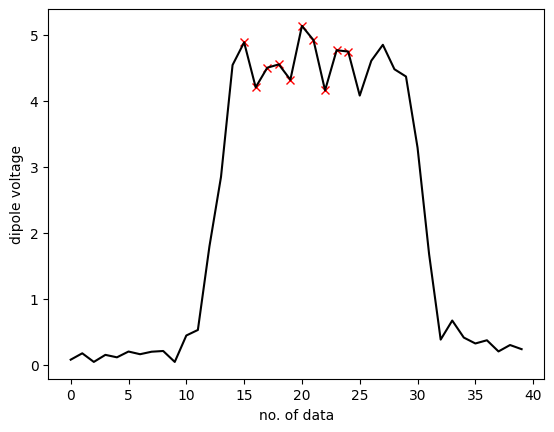

In [33]:

plt.plot(newa[10009],'x',color='r')
plt.plot(n1[10009],color='black')
plt.xlabel('no. of data')
plt.ylabel('dipole voltage')

In [34]:
#finding intensity

extract1=np.array(extract)
extract1=extract1**2


In [35]:
#calculating s4

s4_new_let=[]
for i in range(len(extract1)):
    s4=sqrt((np.nanmean((extract1[i])**2)-(np.nanmean(extract1[i]))**2)/(np.nanmean(extract1[i]))**2)
    s4_new_let.append(s4)

In [36]:
v1_intensity=v1**2

In [37]:
#finding exact time....

In [38]:
#time around puls



time_pulse1=[]
for i in range(len(x)):
                 timeframe=pd.DataFrame(time,index=None)
                 t_1=(timeframe.iloc[x[i]-20:x[i]+20]).reset_index(drop=True)
                 time_pulse1.append(t_1)

In [39]:
time_pulse1=np.array(time_pulse1)

In [40]:
#time in micrsecond

time_micro=time_pulse1/10**(-6)
real_time=[]
for i in range(10410):
                 real_time1=time_micro[i]-time_micro[i][0]
                 real_time.append(real_time1)
                 

In [41]:
time_extract=[]
for i in range(10411):
                 c=time_pulse1[i][pos[i]]
                 time_extract.append(c)

In [42]:

middle_index=[]
for u in range(10411):
                 nu=time_extract[u][int(len(time_extract[u])/2)]
                 middle_index.append(nu)

In [43]:
middle_index=pd.DataFrame(middle_index)

In [44]:
time_for_s4_new=[]
for i in range(len(middle_index[0])):
    dt_obj1 = pd.to_datetime(middle_index[0][i], unit='s',origin='1968-05-24')
    time_for_s4_new.append(dt_obj1)
df2 = pd.DataFrame (time_for_s4_new, columns = ['time'])
time_real=pd.to_datetime(df2['time'],format='%Y-%m-%d %H:%M:%S.%f')

In [45]:
#plotting

Text(0.5, 0, 'time(UT)')

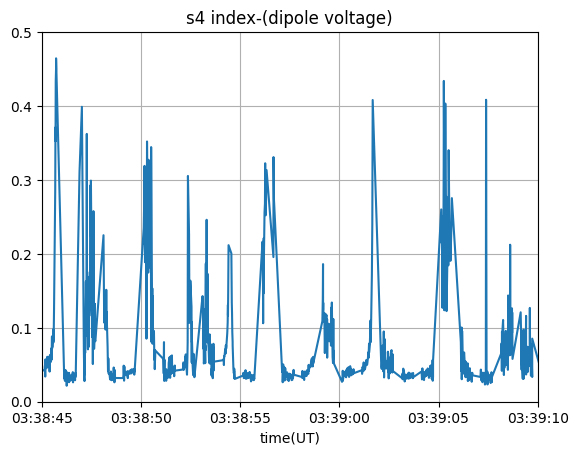

In [46]:
plt.plot(time_real,s4_new_let)
plt.xlim(left=pd.Timestamp('2015-04-01 03:38:45'),right=pd.Timestamp('2015-04-01 03:39:10'))
plt.ylim(0,0.5)
plt.title('s4 index-(dipole voltage)')
plt.grid(True)
#plt.xlim(4000,4200)
plt.xlabel('time(UT)')

(0.0, 16.0)

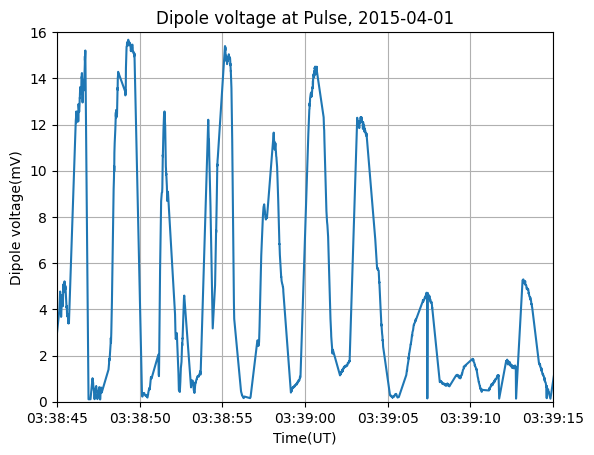

In [47]:
plt.plot(time_1[x],v1[x])
plt.xlim(left=pd.Timestamp('2015-04-01 03:38:45'),right=pd.Timestamp('2015-04-01 03:39:15'))
plt.grid(True)
plt.xlabel('Time(UT)')
plt.ylabel('Dipole voltage(mV)')
plt.title('Dipole voltage at Pulse, 2015-04-01')
plt.ylim(0,16)

In [48]:
print('\u03BC')

μ


Text(0, 0.5, 'dipole voltage(mV)')

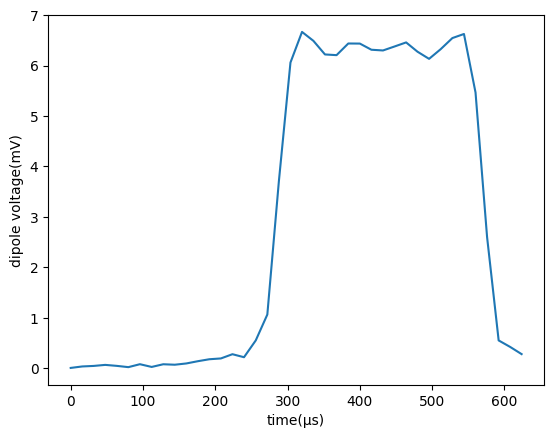

In [49]:
plt.plot(real_time[592],n1[592])
plt.xlabel('time(μs)')
plt.ylabel('dipole voltage(mV)')


Text(0, 0.5, 'Dipole voltage(mV)')

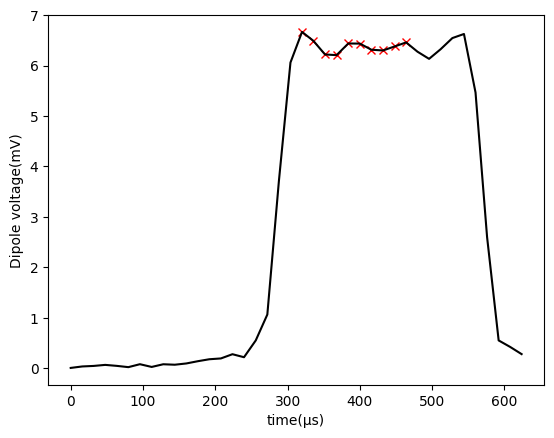

In [50]:
plt.plot(real_time[592],newa[592],'x',color='r')
plt.plot(real_time[592],n1[592],color='black')
plt.xlabel('time(μs)')
plt.ylabel('Dipole voltage(mV)')

In [87]:
fn_.RRI_point()


array([[[-0.35146291, -0.35384005, -0.35620672, ..., -0.40935504,
         -0.40934767, -0.40934381],
        [ 0.86935242,  0.86686843,  0.86457634, ...,  0.8052499 ,
          0.80496246,  0.80469364],
        [-0.34741751, -0.3511912 , -0.35443418, ..., -0.4286376 ,
         -0.42918156, -0.4296864 ]],

       [[-0.42992496, -0.43971887, -0.450118  , ..., -0.61225894,
         -0.61088035, -0.60948911],
        [-0.47952432, -0.48557914, -0.49117058, ...,  0.10566601,
          0.10738679,  0.10907677],
        [-0.76499696, -0.75555256, -0.74575114, ...,  0.78348296,
          0.78432419,  0.78517244]],

       [[-0.83164711, -0.82549578, -0.81884644, ...,  0.676192  ,
          0.67743997,  0.67869207],
        [-0.1195046 , -0.11291936, -0.10610436, ...,  0.5831599 ,
          0.58323986,  0.58329466],
        [ 0.5422921 ,  0.55299644,  0.56412024, ...,  0.44991583,
          0.44792717,  0.44595273]]])

In [88]:
fn_.RRI_mono_point()

array([[[-0.36906385, -0.36463898, -0.36072508, ..., -0.26632721,
         -0.26573947, -0.26519255],
        [ 0.88000976,  0.87761292,  0.87463597, ..., -0.62877543,
         -0.63058766, -0.63238308],
        [-0.29895602, -0.31118159, -0.32386622, ..., -0.73055546,
         -0.72920623, -0.72784927]],

       [[ 0.36906385,  0.36463898,  0.36072508, ...,  0.26632721,
          0.26573947,  0.26519255],
        [-0.88000976, -0.87761292, -0.87463597, ...,  0.62877543,
          0.63058766,  0.63238308],
        [ 0.29895602,  0.31118159,  0.32386622, ...,  0.73055546,
          0.72920623,  0.72784927]],

       [[ 0.86038658,  0.86129849,  0.86197083, ...,  0.87256261,
          0.87274465,  0.87291221],
        [ 0.20185971,  0.1909001 ,  0.18001569, ..., -0.47932873,
         -0.47870709, -0.47811221],
        [-0.46796111, -0.47087372, -0.47392049, ...,  0.0942256 ,
          0.09568853,  0.09712362]],

       [[-0.86038658, -0.86129849, -0.86197083, ..., -0.87256261,
         -